In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
cf3  = np.genfromtxt('cf3.csv' , delimiter='|', filling_values=-1, names=True, dtype=None, encoding=None)
pgc_cf3 = cf3['PGC']
DM_cf3  = cf3['DM']
eDM_cf3 = cf3['eDM']
N_cf3   = cf3['N']  
C_cf3   = cf3['C']  
F_cf3   = cf3['F']
I_cf3   = cf3['I']
S_cf3   = cf3['S']
H_cf3   = cf3['H']
VVmod_cf3 = cf3['Vmod']
Ks_cf3 = cf3['Ks']

In [3]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        table
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [4]:
table = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

ip  = table["pgc"]
p2  = table["P0_w2"]
p2p = table["P0_w2p"]
p1  = table["P0_w1"]
rs  = table["R_source"]



In [5]:
for i, id in enumerate(ip):
    
    if id==28120: #p1[i]!=0:
        delta = np.abs(p1[i]-p2[i])
#         if delta > 1.7:
        print id, p1[i], p2[i], p2p[i], '%.1f'%delta, rs[i]

            


28120 13.13 13.47 14.18 0.3 2


In [56]:
table = np.genfromtxt('DMs_EDD.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_edd = table['pgc']
logWimx   = table['logWimx']
logWimx_e = table['logWimx_e']
inc   = table['inc']
Vmod_edd   = table['Vmod']
Vls_edd   = table['Vls']

DM_edd  = table['DMr']
dDM_edd = table['dDMr']


DM_edd  = table['DMi']
dDM_edd = table['dDMi']
DM_edd_raw  = table['DMi_raw']

# DM_edd  = table['DMz'] 
# dDM_edd = table['dDMz']

# dDM_edd = table['dDMz']
# DM_edd  = (table['DMr']+table['DMi']+table['DMz'])/3.

# DM_edd  = table['DM_w1']
# dDM_edd = table['dDM_w1']
# DM_edd_raw  = table['DMw1_raw']


ggg = table['ggg']
rrr = table['rrr']
iii = table['iii']
zzz = table['zzz']
w11 = table['w1']
w22 = table['w2']


Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

RS = table['RS']
P0 = table['P0']


I = iii-DM_edd


W1 = w11-DM_edd
print len(pgc_edd)

g_i = ggg-iii

i_w = iii-w11

10737


In [57]:
g = 0
for i, id in enumerate(pgc_edd):
    delta = np.abs(DM_edd[i]-DM_edd_raw[i])
    if delta > 1: # id == 39573:
        print id, Sqlt[i], Wqlt[i], DM_edd[i], DM_edd_raw[i], "%.2f"%delta, P0[i], RS[i], logWimx_e[i]
        g+=1
        
print g

42407 4 5 28.82 30.31 1.49 5.37 2 0.01
214808 5 0 39.57 38.44 1.13 -1.09 0 0.027
2019495 4 0 40.11 38.8 1.31 -0.7 0 0.017
3


In [58]:
drop = np.genfromtxt('TF_drop.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop = drop['PGC']


faint = np.genfromtxt('TF_faint.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_faint = drop['PGC']

In [59]:
logD = (DM_edd-25)/5.
logH = np.log10(Vmod_edd) - logD  

keep = pgc_edd*0.

p = 0
for i, idd in enumerate(pgc_edd):
    
    if not idd in pgc_drop and not idd in pgc_faint:
        
        keep[i] = 1
    else:
        p+=1

        
print p

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


474


In [60]:
# indx, = np.where((logH<10) & (logH>0.5) & (Vmod_edd>4000) & (iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
#                  & (Sqlt>3) & (keep==1) & (logWimx>0) & (iii<100) & (DM_edd>0) & (RS>-1))

indx, = np.where((logH<2.5) & (logH>1.5) & (Vmod_edd>4000) & (w11>0) & (Wqlt>3) & 
                 (keep==1) & (W1<-16.1))# & (logWimx>0) & (i_w<-0.3)) #  & (logWimx<10.0) & (iii>0) & (I<-17)& (Sqlt>3))

Vmod = Vmod_edd[indx]
X0 = logWimx[indx]
X1  = logWimx_e[indx]
Ye = 0.2*dDM_edd[indx]
V  = Vls_edd[indx]
Y  = logH[indx]
lgD = logD[indx]
I = I[indx]
ID = pgc_edd[indx]
DM = DM_edd[indx]
INC = inc[indx]
mag_i = iii[indx]
mag_z = zzz[indx]
GI = g_i[indx]
W1 = W1[indx]
w1_mag = w11[indx]
P = X0/X1

P0 = P0[indx]

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


11.34 92.24199567539708
11.83 85.78147922863279
12.26 81.66910031525522
12.77 79.9687816902568
13.285 76.37478982394349
13.74 75.5598274102943
14.24 73.73726986266067
14.72 74.48231710584808
15.14 68.92799048328311
15.7 75.08821920248968
16.21 63.2148050475821
16.53 79.9824042292329
Fit med: 78.24755181844091
med:  1.8934707583798325 78.24755181844091


/home/ehsan/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(11, 18)

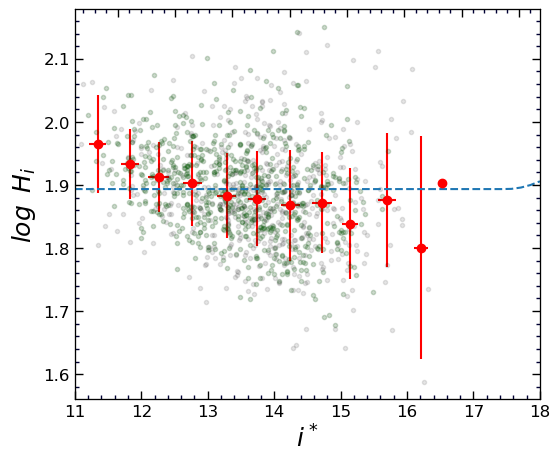

In [61]:
def hf(x,x0,a,c):
    
    y = a*x**2-2*a*x0*x+c
    
    try: 
        y[x<x0] = -a*x0**2+c
    except:
        if x<x0: y=0
    
    return y


fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(mag_i,Y, 'k.', alpha=0.1)
# ax.set_ylim(-0.02, 0.2)


for i, id in enumerate(ID):
    
    if id in pgc_cf3:
        ax.plot(mag_i[i], Y[i], 'g.', alpha=0.1)  
        
        
        
X = mag_i 


for i in np.arange(11,18,0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$i^*$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_i$', fontsize=18) 

v = np.linspace(11,18,50)


fit, cov = curve_fit(hf, X, Y, sigma=Ye)
ax.plot(v,hf(v, fit[0], fit[1], fit[2]), '--')


set_axes(ax, fontsize=12)



# y = Y[(mag_i>12) & (mag_i<15)]
# ye = Ye[(mag_i>12) & (mag_i<15)]
# print 10**np.median(Y)
# print  10**(np.sum(y/ye)/np.sum(1./ye))
# med = np.median(Y)
# print "med0= ", med, 10**med

print "Fit med:", 10**(hf(fit[0], fit[0], fit[1], fit[2]) )
med = (hf(fit[0], fit[0], fit[1], fit[2]) )


print "med: ", med, 10**med

ax.set_xlim(11,18)

-4.045 85.19920348612898
-3.66 101.40157926131059
-3.16 78.85010650176216
-2.72 78.1793796710587
-2.21 78.63960131916927
-1.73 74.62993643560118
-1.18 77.8098283492999
-0.74 76.612365384477
-0.24 77.50041120003739
0.25 77.32576852008829
0.77 76.66613147241912
1.23 76.97876645607988
1.67 78.02145102617416
2.13 74.10943942461101
2.63 86.55904394643896
3.24 87.46881838701752
3.76 78.31997872374582
[0.0026434  0.00303159 1.88879071]
1.8871244084478782 77.11243345051726


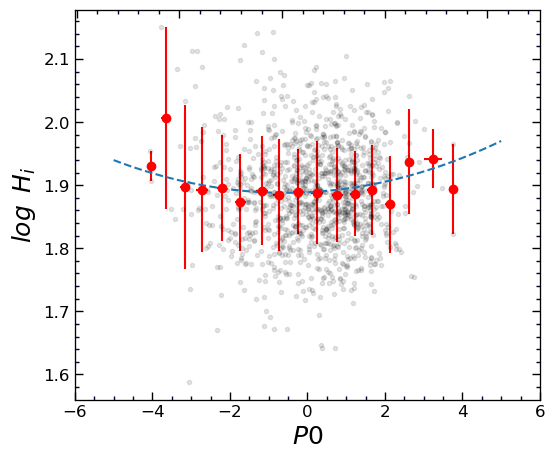

In [62]:
def hf(x,x0,a,c):
    
    y = a*x**2-2*a*x0*x+c
    
    try: 
        y[x<x0] = -a*x0**2+c
    except:
        if x<x0: y=0
    
    return y


fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(P0,Y, 'k.', alpha=0.1)


for i, id in enumerate(ID):
    
    if id in pgc_cf3:
        ax.plot(mag_i[i], Y[i], 'g.', alpha=0.1)  
        
        
        
X = P0 


for i in np.arange(-6,6,0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$P0$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_i$', fontsize=18) 

set_axes(ax, fontsize=12)


ax.set_xlim(-6,6)

v = np.linspace(-5, 5, 50)
c = np.polyfit(X, Y, 2, w=1./Ye)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], '--')

# Y = Y - (c[0]*X**2+c[1]*X+c[2]) + med

print c
med = np.median(Y)
print med, 10**med


11.34 92.24199567539708
11.83 85.78147922863279
12.26 81.66910031525522
12.77 79.9687816902568
13.285 76.37478982394349
13.74 75.5598274102943
14.24 73.73726986266067
14.72 74.48231710584808
15.14 68.92799048328311
15.7 75.08821920248968
16.21 63.2148050475821
16.53 79.9824042292329


(11, 18)

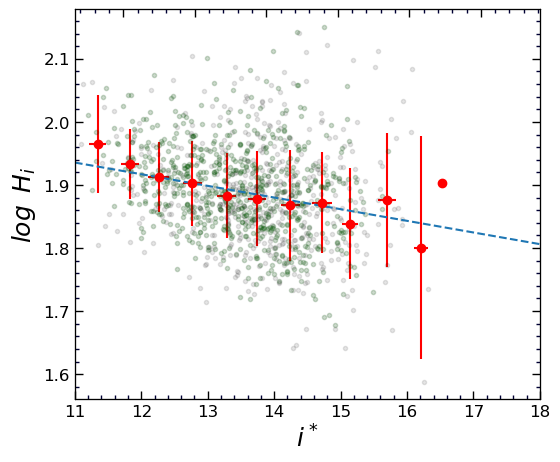

In [63]:
def hf(x,x0,a,c):
    
    y = a*x**2-2*a*x0*x+c
    
    try: 
        y[x<x0] = -a*x0**2+c
    except:
        if x<x0: y=0
    
    return y


fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(mag_i,Y, 'k.', alpha=0.1)
# ax.set_ylim(-0.02, 0.2)


for i, id in enumerate(ID):
    
    if id in pgc_cf3:
        ax.plot(mag_i[i], Y[i], 'g.', alpha=0.1)  
        
        
        
X = mag_i 


for i in np.arange(11,18,0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$i^*$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_i$', fontsize=18) 

v = np.linspace(11,18,50)


set_axes(ax, fontsize=12)


c = np.polyfit(X[(X>12.)&(X<15)],Y[(X>12.)&(X<15)], 1, w=1./Ye[(X>12.)&(X<15)])
ax.plot(v,c[0]*v+c[1], '--')


ax.set_xlim(11,18)

11.22 97.39473775791447
11.870000000000001 84.10471103470229
12.305 83.65015899906444
12.79 81.92998559445067
13.254999999999999 75.9934594124663
13.75 76.29650364349436
14.24 75.28341780760053
14.72 73.61680699545605
15.17 76.81721899248399
15.76 72.56013855998937
16.17 76.43390237474911
16.675 75.53865363972804
17.17 63.2148050475821
[ 0.00518672 -0.16056792  3.11294256]
1.8871244084478782 77.11243345051726


(10, 18)

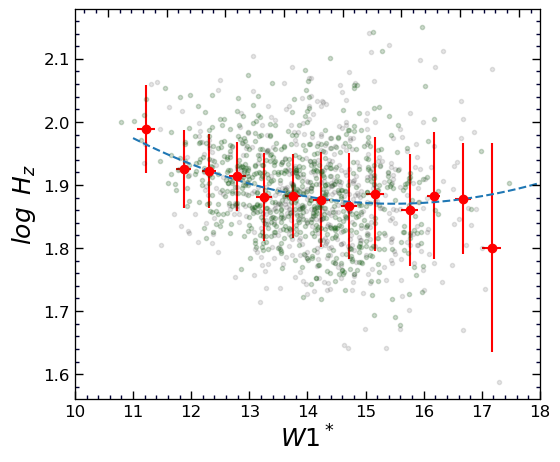

In [64]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(w1_mag,Y, 'k.', alpha=0.1)
# ax.set_ylim(-0.02, 0.2)


for i, id in enumerate(ID):
    
    if id in pgc_cf3:
        ax.plot(w1_mag[i], Y[i], 'g.', alpha=0.1)  
        
        
X = w1_mag 


for i in np.arange(11,18,0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$W1^*$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(11,18,50)

c = np.polyfit(X,Y, 2)#, w=1./Ye[(X>2.3)&(X<2.8)])
ax.plot(v,c[0]*v**2+c[1]*v+c[2], '--')


print c

set_axes(ax, fontsize=12)

print med, 10**med

ax.set_xlim(10,18)

49.0 74.5868612161198
52.0 75.03745386231964
57.0 73.98996854889954
62.0 74.1851996684219
68.0 75.99222941755431
72.0 77.23790578066738
77.0 79.01881791781102
81.5 78.81837966369699
88.0 79.32727684562751


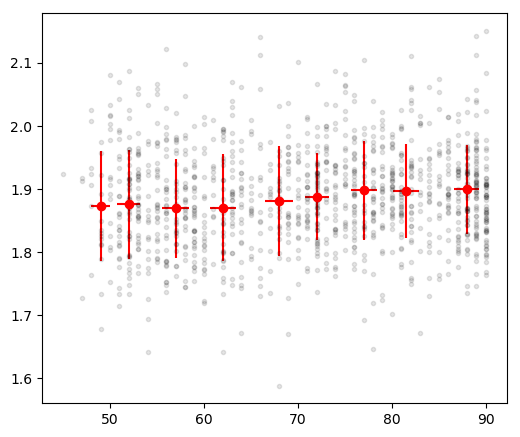

In [65]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(INC,Y, 'k.', alpha=0.1)
# ax.set_ylim(-0.02, 0.2)



for i in np.arange(45,90,5):
    xp = []
    yp = []
    for ii in range(len(INC)):
        xi = INC[ii]
        if xi>=i and xi<i+5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)
        
        


-22.72 77.09613778883947
-22.165 77.22959128436423
-21.589999999999996 74.16944647333281
-20.83 76.67817877089749
-20.195 76.82190232249039
-19.52 81.80798547797703
-18.869999999999997 84.86521114187846
-18.125 106.21257598229286
-17.37 122.29067728885957
1.8871244084478782 77.11243345051726


(-25, -17)

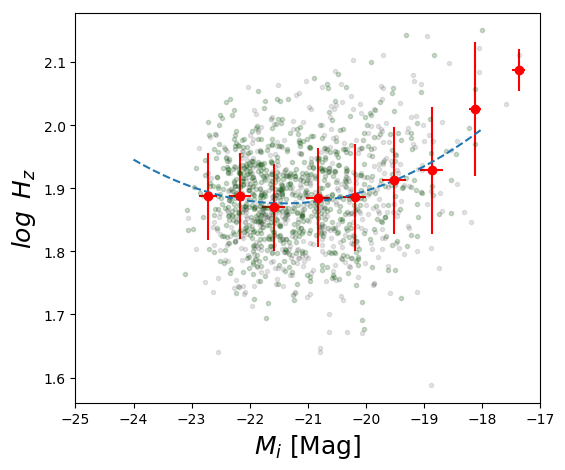

In [66]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(I,Y, 'k.', alpha=0.1)
# ax.set_ylim(-0.02, 0.2)


for i, id in enumerate(ID):
    
    if id in pgc_cf3:
        ax.plot(I[i], Y[i], 'g.', alpha=0.1)   
        
        
X = I 


for i in np.arange(-24,-17,0.7):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.7:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)
        
ax.set_xlabel(r'$M_i$'+' [Mag]', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 


v = np.linspace(-24,-18,50)
c = np.polyfit(X[X>-23],Y[X>-23], 2)#, w=1./Ye[(X>2.3)&(X<2.8)])
ax.plot(v,c[0]*v**2+c[1]*v+c[2], '--')


print med, 10**med

ax.set_xlim(-25,-17)

C=  [36.14247705 -2.59028824  1.92181093]
Median =  1.8871244084478782 77.11243345051726
0.007 80.21431820961158
0.012 80.63013902977501
0.017 76.56158438186408
0.022 75.1445291173586
0.027 73.28636436022266
0.031 73.90941900118844
0.0365 74.60348322112384
0.042 76.50683010602154
0.046 79.06907723273301
0.051 77.41373120863264
77.11243345051726


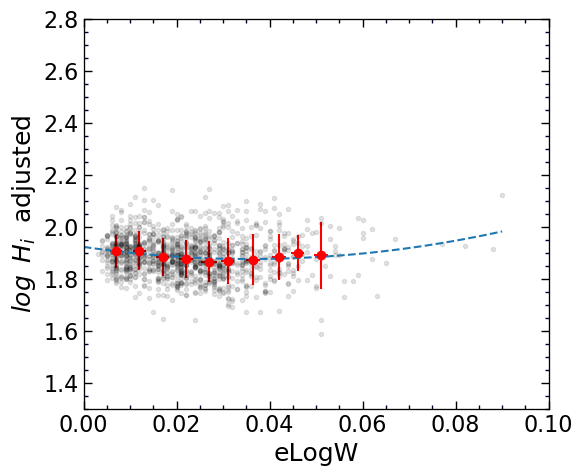

In [67]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.set_xlim(0,0.1)
ax.set_ylim(1.3,2.8)
v = np.linspace(0,0.09,50)

X = X1

xx = X
yy = Y

c = np.polyfit(X[X<0.1],Y[X<0.1], 2, w=1./Ye[X<0.1])


print 'C= ', c


print 'Median = ', med,  10**med

ax.plot(X, Y, 'k.', alpha=0.1)
ax.plot(v, c[0]*v**2+c[1]*v+c[2], '--')


XL = []
YL = []
YLe = []
for i in np.arange(0,0.08,0.005):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.005:# and ID[ii] in pgc_cf3:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('eLogW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{i}$'+'  adjusted', fontsize=18) 



set_axes(ax)

print 10**med

# Y = Y - (c[0]*X**2+c[1]*X+c[2]) + med  


2.271 86.51368786627589
2.3555 79.8043940561161
2.452 76.30964790235849
2.552 74.47524371417911
2.646 76.13655609545395
2.729 79.52684299947397
[-0.01429864  1.92911003]


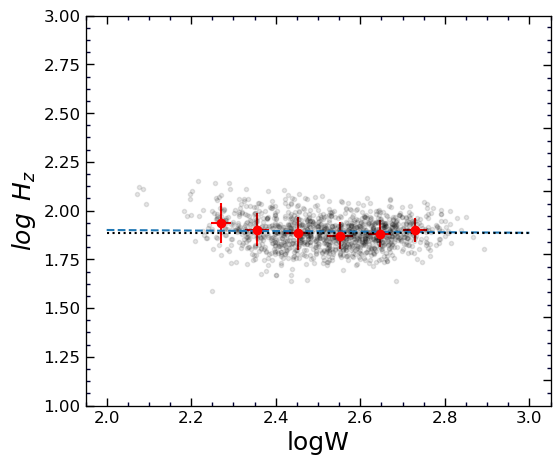

In [68]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = X0 

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(2.2,2.8,0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('logW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(2,3,50)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X[(X>2.2)&(X<2.8)],Y[(X>2.2)&(X<2.8)], 1, w=1./Ye[(X>2.2)&(X<2.8)])
ax.plot(v,c[0]*v+c[1], '--')


print c

set_axes(ax, fontsize=12)

# 
Y = Y - (c[0]*X+c[1])+ med
# 

ax.set_ylim(1,3)

ax.plot([2.0, 3.0],[med, med], ':', color= 'k')

4737 75.5
5426 75.9
6511 76.8
7451 77.5
8480 76.5
9487 75.5
10443 74.5
11682 77.8
12421 79.4
13458 71.3
14735 73.5
15059 69.8
16856 65.9
17450 64.0
78.17338873744585 74.49273346888691
[-1.90409344e-06  1.90067531e+00]
1.8930589385923273
76.06994642455446
76.5967486393242


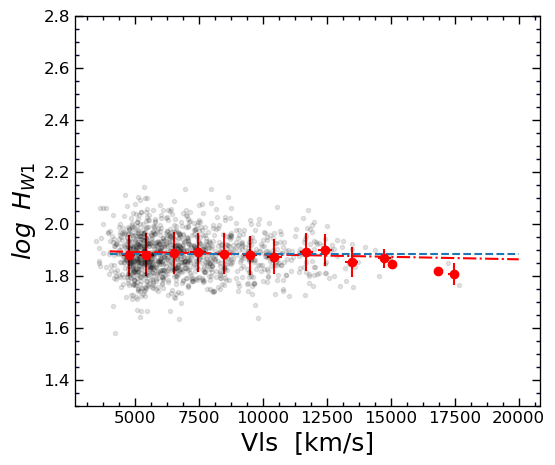

In [69]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = V

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:# and ID[ii] in pgc_cf3:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print "%d"%np.median(xp), "%.1f"%10**np.median(yp)

ax.set_xlabel('Vls  [km/s]', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{W1}$', fontsize=18) 

v = np.linspace(4000,20000,2000)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X[X>4000],Y[X>4000], 1, w=1./Ye[X>4000])
ax.plot(v,c[0]*v+c[1], 'r-.')


ax.set_ylim(1.3,2.8)

set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])
print c
print c[0]*4000.+c[1]

print 10**np.median(Y)
m = (np.sum(Y[X>4000]/Ye[X>4000])/np.sum(1./Ye[X>4000]))
H0 = 10**m
print  H0

ax.plot([4000,20000], [m,m], '--')

In [70]:
len(Y)

1216

-23.509999999999998 41.85518069448699
-22.75 69.7688798680459
-22.17 74.5072461016964
-21.550000000000004 73.69946360756148
-20.849999999999998 75.51666534243165
-20.18 75.73405516570197
-19.490000000000002 74.62778828335404
-18.85 75.1678302348595
-18.13 76.10179527144724
-17.470000000000002 95.72191191748787
1.8694378937836977 74.0351386042994


(-25, -17)

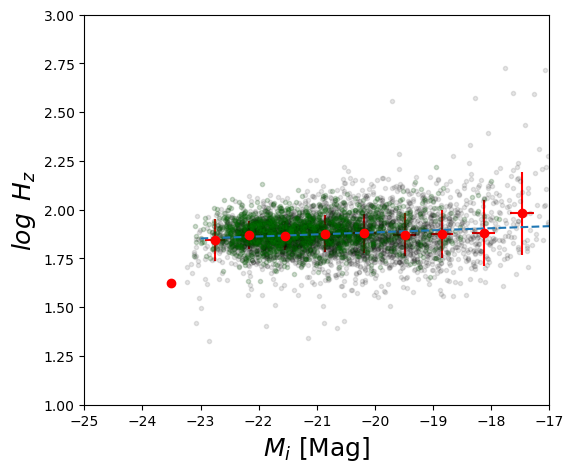

In [21]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(I,Y, 'k.', alpha=0.1)
# ax.set_ylim(-0.02, 0.2)


for i, id in enumerate(ID):
    
    if id in pgc_cf3:
        ax.plot(I[i], Y[i], 'g.', alpha=0.1)   
        
        
X = I 


for i in np.arange(-24,-17,0.7):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.7:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)
        
ax.set_xlabel(r'$M_i$'+' [Mag]', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 


v = np.linspace(-23,-17,50)
c = np.polyfit(X[X>-23],Y[X>-23], 1)#, w=1./Ye[(X>2.3)&(X<2.8)])
ax.plot(v,c[0]*v+c[1], '--')


med = np.median(Y[(I>-22) & (I<-21)])
print med, 10**med

# Y = Y - (c[0]*X+c[1])+ med

ax.set_ylim(1,3)
ax.set_xlim(-25,-17)

11.37 91.77913965335304
11.83 86.48879362055109
12.31 81.3723234517655
12.78 80.50511527312102
13.26 77.86138775650967
13.74 75.89993670603238
14.23 73.86761669969685
14.71 72.80921214519367
15.23 71.29134272920423
15.73 68.29220175874916
16.21 62.463714550570835
16.725 62.256114458993665
17.15 65.65996052066522
17.615000000000002 53.524593307555236
[-0.02194702  2.18551111]
1.8732468242444824 74.68731110643594


(1, 3)

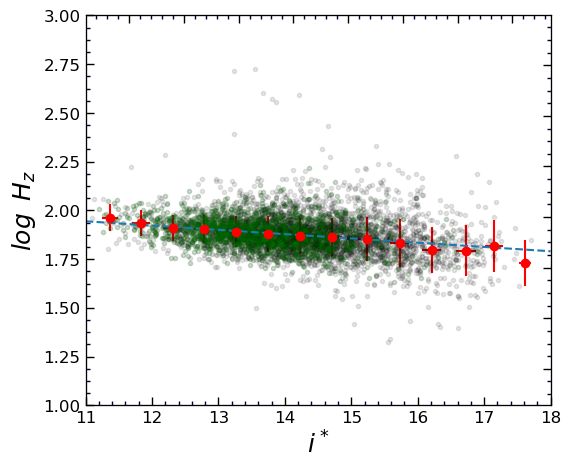

In [22]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(mag_i,Y, 'k.', alpha=0.1)
# ax.set_ylim(-0.02, 0.2)


for i, id in enumerate(ID):
    
    if id in pgc_cf3:
        ax.plot(mag_i[i], Y[i], 'g.', alpha=0.1)  
        
        
X = mag_i 


for i in np.arange(11,18,0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$i^*$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(11,18,50)

c = np.polyfit(X[(X>12.5)&(X<14.5)],Y[(X>12.5)&(X<14.5)], 1, w=1./Ye[(X>12.5)&(X<14.5)])
ax.plot(v,c[0]*v+c[1], '--')

print c

set_axes(ax, fontsize=12)

med0 = np.median(Y)

print med0, 10**med0

ax.set_xlim(11,18)
ax.set_ylim(1,3)

C=  [-0.53929412  1.88463263]
Median =  1.8789272717334664 75.670616410862
0.008 76.7219586838204
0.014 75.51182340926408
0.024 73.6728354878542
0.033 72.30217668674202
0.0435 75.20150097804168
0.054 73.57536549425801
0.062 73.31956597197161
0.073 69.70625904233245


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05e1030a50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05e112b290>)

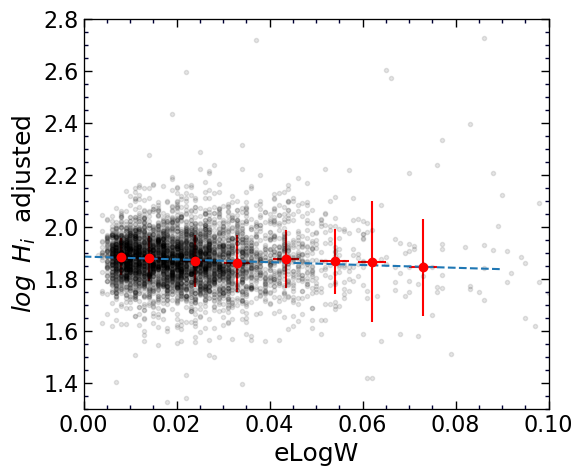

In [23]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.set_xlim(0,0.1)
ax.set_ylim(1.3,2.8)
v = np.linspace(0,0.09,50)

X = X1

xx = X
yy = Y

c = np.polyfit(X[X<0.04],Y[X<0.04], 1, w=1./Ye[X<0.04])


print 'C= ', c

med00 = np.sum(Y[X<0.02]/Ye[X<0.02])/np.sum(1./Ye[X<0.02])

print 'Median = ', med00,  10**med00




ax.plot(X, Y, 'k.', alpha=0.1)
ax.plot(v,c[0]*v+c[1], '--')


XL = []
YL = []
YLe = []
for i in np.arange(0,0.08,0.01):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.01:# and ID[ii] in pgc_cf3:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('eLogW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{i}$'+'  adjusted', fontsize=18) 



set_axes(ax)


Text(0.5,0,'$DM_{cf3}$')

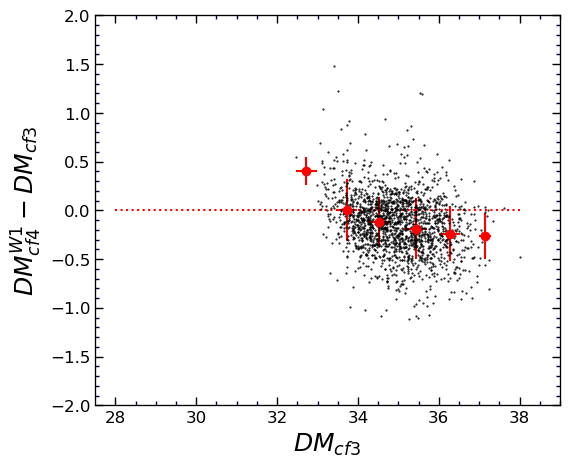

In [24]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


Y = 5.*(np.log10(Vmod) - Y)+25.

XX = []
YY = []
for i, id in enumerate(pgc_cf3):
    
    if id in ID:      
        ix, = np.where(ID==id)
        ax.errorbar(DM_cf3[i], Y[ix][0]- DM_cf3[i],  capsize=3, color='k', fmt='.' , ms=1)
        XX.append(DM_cf3[i])
        YY.append(Y[ix][0]- DM_cf3[i])
            
for i in np.arange(29,38,1):
    xp = []
    yp = []
    for ii in range(len(XX)):
        xi = XX[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(YY[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)               
            

ax.set_ylabel(r'$DM^{W1}_{cf4}-DM_{cf3}$', fontsize=18)                                                 
set_axes(ax, [27.5,39],[-2,2], fontsize=12)
ax.plot([28,38],[0,0], 'r:')
ax.set_xlabel('$DM_{cf3}$', fontsize=18) 


3805.0 -0.03868105673888067
5103.0 -0.1283948326562232
6853.0 -0.1288182672527327
9014.0 -0.11876957965105106
10707.0 -0.1289259701292096
12663.0 -0.17883597183517708
14731.0 -0.17891564245611846
16905.5 -0.20874597354114144
18123.0 -0.10882711954395319
-0.1401952597717548


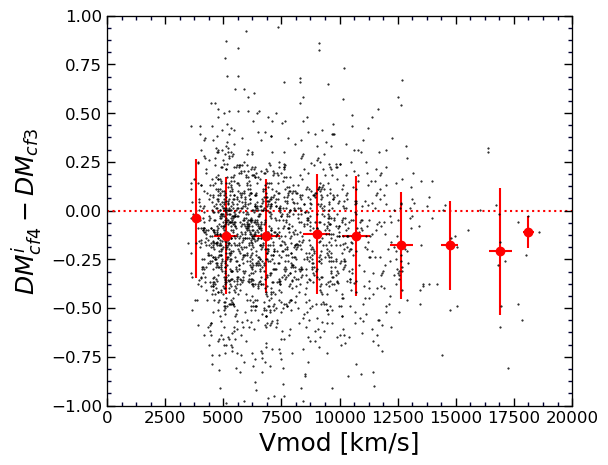

In [25]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)



XX = []
YY = []
for i, id in enumerate(pgc_cf3):
    
    if id in ID:
        ix, = np.where(ID==id)
        ax.errorbar(V[ix][0], Y[ix][0]- DM_cf3[i],  capsize=3, color='k', fmt='.' , ms=1)
        XX.append(V[ix][0])
        YY.append(Y[ix][0]- DM_cf3[i])
            
for i in np.arange(0,20000,2000):
    xp = []
    yp = []
    for ii in range(len(XX)):
        xi = XX[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(YY[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)      
        print np.median(xp), np.median(yp)
            

ax.set_xlabel('Vmod [km/s]', fontsize=18) 
ax.set_ylabel(r'$DM^i_{cf4}-DM_{cf3}$', fontsize=18)                                                 
            
ax.plot([0,20000],[0,0], 'r:')
set_axes(ax, [0,20000],[-1,1], fontsize=12)

# set_axes(ax, [27.5,39],[-1,1], fontsize=12)
# ax.plot([28,38],[0,0], 'r:')
# ax.set_xlabel('$DM_{cf3}$', fontsize=18) 

print np.mean(YY)

3805.0 -0.03868105673888067
5103.0 -0.1283948326562232
6853.0 -0.1288182672527327
9014.0 -0.11876957965105106
10707.0 -0.1289259701292096
12663.0 -0.17883597183517708
14731.0 -0.17891564245611846
16905.5 -0.20874597354114144
18123.0 -0.10882711954395319
-0.1401952597717548


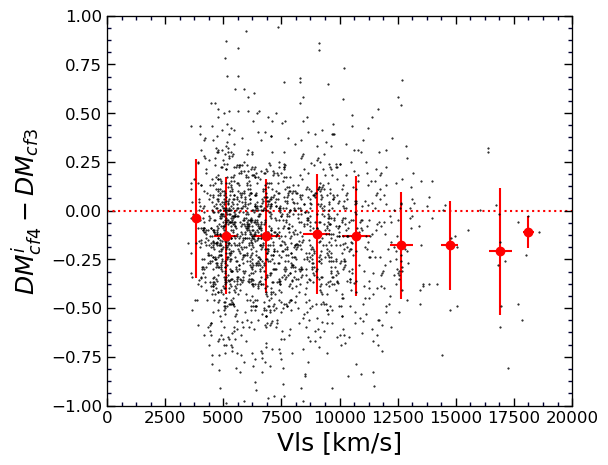

In [26]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)



XX = []
YY = []
for i, id in enumerate(pgc_cf3):
    
    if id in ID:
        ix, = np.where(ID==id)
        ax.errorbar(V[ix][0], Y[ix][0]- DM_cf3[i],  capsize=3, color='k', fmt='.' , ms=1)
        XX.append(V[ix][0])
        YY.append(Y[ix][0]- DM_cf3[i])
            
for i in np.arange(0,20000,2000):
    xp = []
    yp = []
    for ii in range(len(XX)):
        xi = XX[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(YY[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)      
        print np.median(xp), np.median(yp)
            

ax.set_xlabel('Vls [km/s]', fontsize=18) 
ax.set_ylabel(r'$DM^i_{cf4}-DM_{cf3}$', fontsize=18)                                                 
            
ax.plot([0,20000],[0,0], 'r:')
set_axes(ax, [0,20000],[-1,1], fontsize=12)

# set_axes(ax, [27.5,39],[-1,1], fontsize=12)
# ax.plot([28,38],[0,0], 'r:')
# ax.set_xlabel('$DM_{cf3}$', fontsize=18) 

print np.mean(YY)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


4562 73.3
5415 73.4
6559 73.5
7481 71.8
8486 71.3
9498 73.8
10508 68.8
11484 73.0
12419 68.1
13370 77.4
14389 69.2
15227 68.2
16612 75.1
17606 65.6
73.81362810824976 70.2542554881205
[-1.95126515e-06  1.87594161e+00]
1.868136552416611
2629


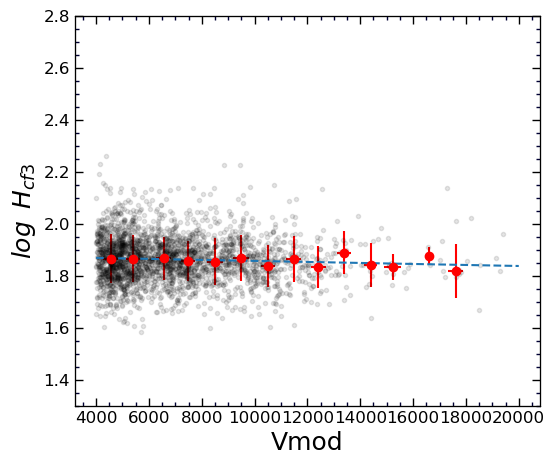

In [27]:
# pgc_edd = table['pgc']
# logWimx   = table['logWimx']
# logWimx_e = table['logWimx_e']
# inc   = table['inc']
# Vmod   = table['Vmod']

# pgc_cf3 = cf3['PGC']
# DM_cf3  = cf3['DM']
# eDM_cf3

Vmod_cf3 = []
logH_cf3 = []
eeDM_cf3 = []

for i, id in enumerate(pgc_cf3):
    
    if id in pgc_edd:      
        ix, = np.where(pgc_edd==id)
        logD_3 = (DM_cf3[i]-25)/5.
        logH_3 = np.log10(Vmod_edd[ix][0]) - logD_3
        Vmod_cf3.append(Vmod_edd[ix][0])
        logH_cf3.append(logH_3)
        eeDM_cf3.append(eDM_cf3[i])

Vmod_cf3 = np.asarray(Vmod_cf3)
logH_cf3 = np.asarray(logH_cf3)
eeDM_cf3  = np.asarray(eeDM_cf3)

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = Vmod_cf3[Vmod_cf3>4000]
Y = logH_cf3[Vmod_cf3>4000]
Ye = eeDM_cf3[Vmod_cf3>4000]

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print "%d"%np.median(xp), "%.1f"%10**np.median(yp)

ax.set_xlabel('Vmod', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{cf3}$', fontsize=18) 

v = np.linspace(4000,20000,2000)
c = np.polyfit(X[X>4000],Y[X>4000], 1, w=1/Ye[X>4000])
ax.plot(v,c[0]*v+c[1], '--')


ax.set_ylim(1.3,2.8)

set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])
print c
print c[0]*4000.+c[1]

print len(Y)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


4574 73.5
5401 73.7
6541 73.0
7476 72.5
8493 73.3
9472 75.7
10497 74.7
11480 75.6
12426 76.1
13448 76.2
14432 75.4
15455 77.5
16458 76.0
17520 72.5
73.26122174854719 76.20013688855133
[1.55287223e-06 1.85866267e+00]
1.8648741569469809
8190


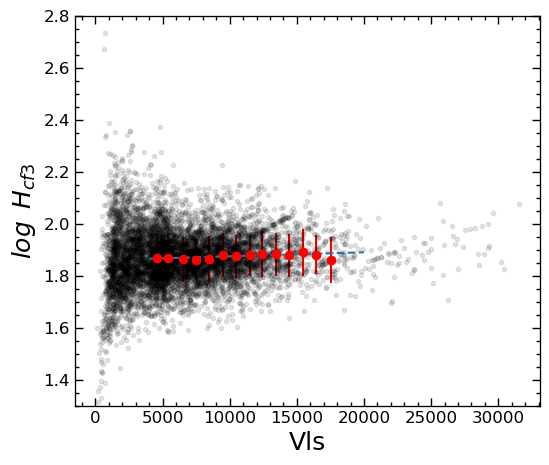

In [28]:
logD_3 = (DM_cf3-25)/5.
logH_3 = np.log10(VVmod_cf3) - logD_3

Vmod_cf3 = VVmod_cf3
logH_cf3 = logH_3
eeDM_cf3 = eDM_cf3

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = Vmod_cf3[(I_cf3=='I') | (H_cf3=='H') | (F_cf3=='F')]
Y = logH_cf3[(I_cf3=='I') | (H_cf3=='H')| (F_cf3=='F')]
Ye = eeDM_cf3[(I_cf3=='I') | (H_cf3=='H')| (F_cf3=='F')]

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000 :
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print "%d"%np.median(xp), "%.1f"%10**np.median(yp)

ax.set_xlabel('Vls', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{cf3}$', fontsize=18) 

v = np.linspace(4000,20000,2000)
c = np.polyfit(X[X>4000],Y[X>4000], 1, w=1/Ye[X>4000])
ax.plot(v,c[0]*v+c[1], '--')


ax.set_ylim(1.3,2.8)

set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])
print c
print c[0]*4000.+c[1]

print len(Y)

5 90.7
6 nan
7 nan
8 72.5
9 71.7
10 72.7
11 nan
12 74.0


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


(5, 15)

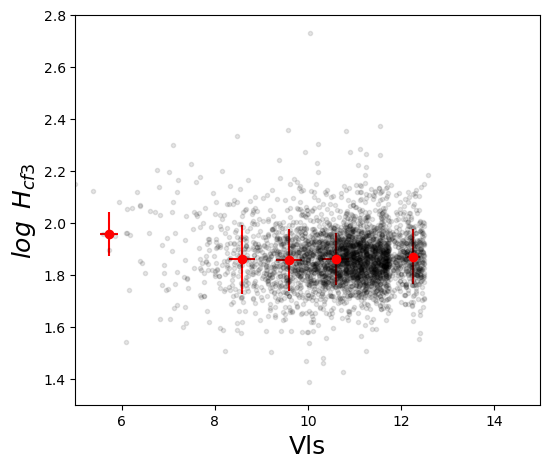

In [29]:
logD_3 = (DM_cf3-25)/5.
logH_3 = np.log10(VVmod_cf3) - logD_3

Vmod_cf3 = Ks_cf3
logH_cf3 = logH_3
eeDM_cf3 = eDM_cf3

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = Vmod_cf3[(I_cf3=='I') | (H_cf3=='H') ]
Y = logH_cf3[(I_cf3=='I') | (H_cf3=='H')]
Ye = eeDM_cf3[(I_cf3=='I') | (H_cf3=='H')]

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(5,15,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 :
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print "%d"%np.median(xp), "%.1f"%10**np.median(yp)

ax.set_xlabel('Vls', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{cf3}$', fontsize=18) 

ax.set_ylim(1.3,2.8)
ax.set_xlim(5,15)


0.04999999999999982 1.0
0.22999999999999865 1.0
0.41000000000000014 1.0
0.6000000000000014 1.0
0.7999999999999989 1.0
0.9700000000000006 1.0
1.1500000000000004 1.0232929922807494


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05e06eac10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05e472fe50>)

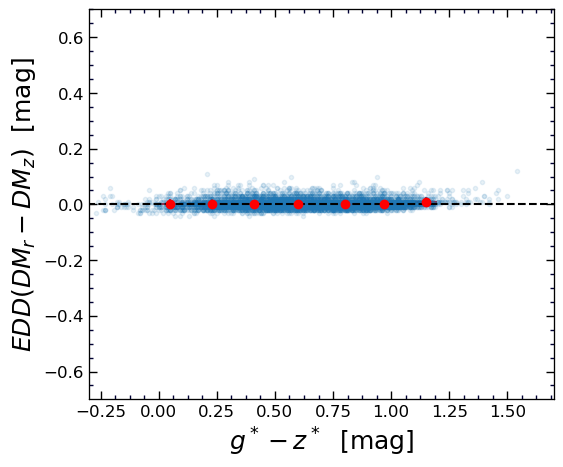

In [30]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  ggg[indx]-zzz[indx] # logWimx[indx] #
Y = DMr[indx]-DMz[indx]

ax.plot(X, Y, '.', alpha=0.1)

# for i in np.arange(-1.8,2.8, 0.2):
for i in np.arange(-0.1,1.3, 0.20):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.plot([-3,3], [0,0], 'k--')
ax.set_xlim(-0.3,1.7)
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$g^*-z^* $'+'  [mag]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_z)$'+'  [mag]', fontsize=18) 
set_axes(ax, fontsize=12)

0.04999999999999982 0.9549925860214291
0.22999999999999865 0.9772372209558151
0.41000000000000014 1.0
0.6000000000000014 1.0
0.7999999999999989 1.0
0.9700000000000006 1.0232929922807494
1.1500000000000004 1.023292992280766


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05c3b149d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05c3e270d0>)

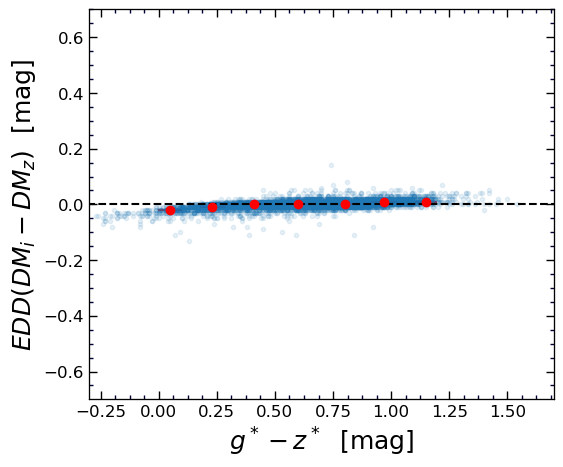

In [31]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  ggg[indx]-zzz[indx] # logWimx[indx] #
Y = DMi[indx]-DMz[indx]

ax.plot(X, Y, '.', alpha=0.1)

# for i in np.arange(-1.8,2.8, 0.2):
for i in np.arange(-0.1,1.3, 0.20):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.plot([-3,3], [0,0], 'k--')
ax.set_xlim(-0.3,1.7)
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$g^*-z^* $'+'  [mag]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{i}-DM_z)$'+'  [mag]', fontsize=18) 
set_axes(ax, fontsize=12)

-0.030000000000001137 0.5799999999999983
0.07000000000000028 0.1850000000000005
0.15500000000000025 0.14999999999999858
0.2599999999999998 0.10000000000000142
0.35999999999999943 0.03999999999999915
0.4599999999999991 -0.00999999999999801
0.5500000000000007 -0.030000000000001137
0.6499999999999986 -0.030000000000001137
0.75 -0.020000000000003126
0.8300000000000001 -0.020000000000003126
0.9299999999999997 -0.0899999999999963
1.0299999999999994 -0.0799999999999983
1.1400000000000006 0.0799999999999983
1.2199999999999989 -0.41999999999999815


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05e04f2e90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05c3e92550>)

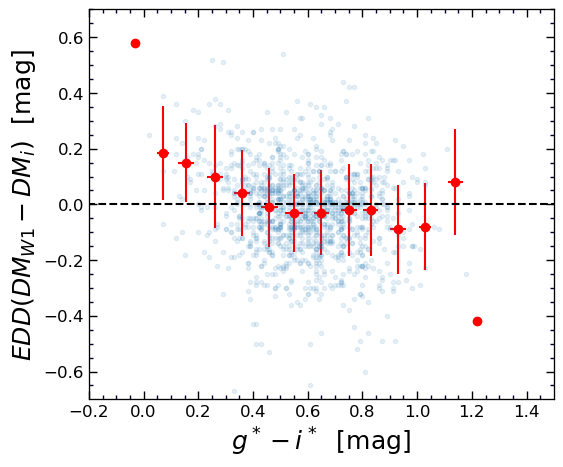

In [32]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) &
                 (Wqlt>3) & (w11>0) &(logWimx<2.6) &(logWimx>2.2))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  ggg[indx]-iii[indx] # logWimx[indx] #
Y = DM_w1[indx]-DMi[indx]

ax.plot(X, Y, '.', alpha=0.1)

# for i in np.arange(-1.8,2.8, 0.2):
for i in np.arange(-0.2,1.5, 0.10):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.10:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), np.median(yp)

ax.plot([-3,3], [0,0], 'k--')
ax.set_xlim(-0.2,1.5)
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$g^*-i^* $'+'  [mag]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 
set_axes(ax, fontsize=12)

In [33]:
np.median(DMi[indx]-DMz[indx])

0.0

[-3.65178788e-06  2.46487766e-02]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05e4b298d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05e4af4a10>)

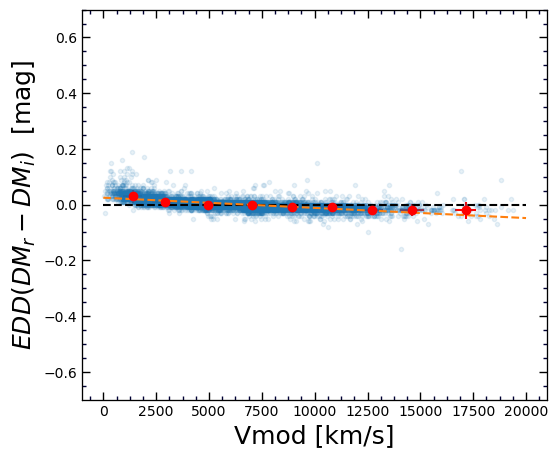

In [34]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & 
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vmod[indx] #
Y = (DMr[indx])-DMi[indx]
Ye = np.sqrt(dDMr**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


v = np.linspace(0,20000,2000)
c = np.polyfit(X,Y, 1)
ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel('Vmod [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

[ 4.31709217e-07 -2.04425275e-03]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05e0e621d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05e6ec86d0>)

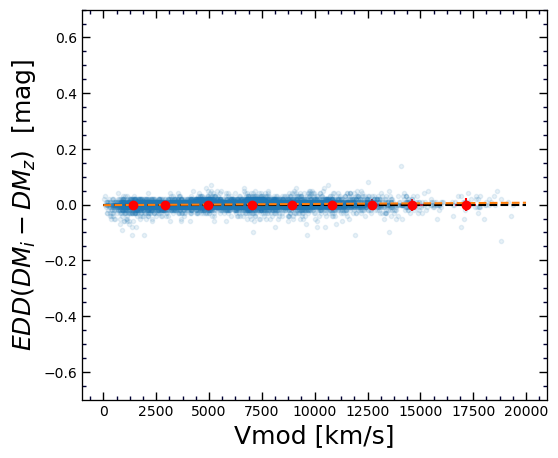

In [35]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & 
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vmod[indx] #
Y = (DMi[indx])-DMz[indx]
Ye = np.sqrt(dDMi**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


v = np.linspace(0,20000,2000)
c = np.polyfit(X,Y, 1)
ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel('Vmod [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{i}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

0.0
0.008498412242361485


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05c3a8e9d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05e4b0a710>)

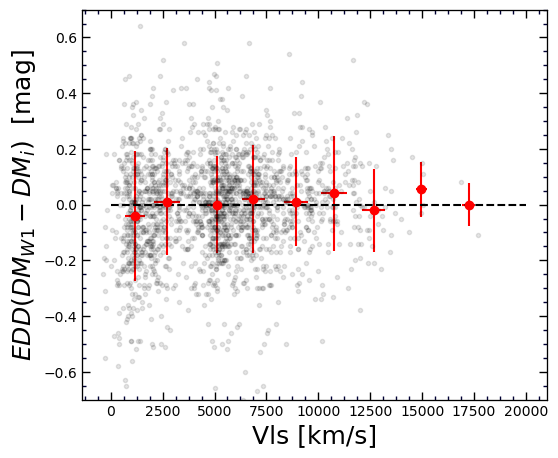

In [36]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
Vls   = table['Vls']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0) & (logWimx<3) & (logWimx>0) )


fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vls[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    ype  = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
            ype.append(Ye[ii])
    if len(xp)>0:
        yp = np.asarray(yp)
        ype = np.asarray(ype)
        yy = np.median(yp)  #    np.sum(yp/ype)/np.sum(1./ype) # 
        ax.errorbar(np.median(xp), yy, yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


# v = np.linspace(0,20000,2000)
# c = np.polyfit(X,Y, 1)
# ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)

# c = np.polyfit(X,Y, 0, w=1./Ye)
# ax.plot(v, v*0+c[0], '--')


ax.set_xlabel('Vls [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print  np.sum(Y/Ye)/np.sum(1./Ye)

set_axes(ax, fontsize=10)

In [37]:
indx, = np.where((zzz>0) & (Sqlt>3) & (Wqlt>3) & (Vmod<20000))
Y = DM_w1[indx]-DMz[indx]
Ye = np.sqrt(dDM_w1[indx]**2+dDMz[indx]**2)
print np.sum(Y/Ye)/np.sum(1./Ye)
np.median(Y), np.mean(Y), np.std(Y)

0.006183525638688951


(0.0, -0.022614026483570405, 0.2097095860120538)

0.0
[ 0.06995075 -0.0247039  -0.34889996]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05e44b14d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05e4495e90>)

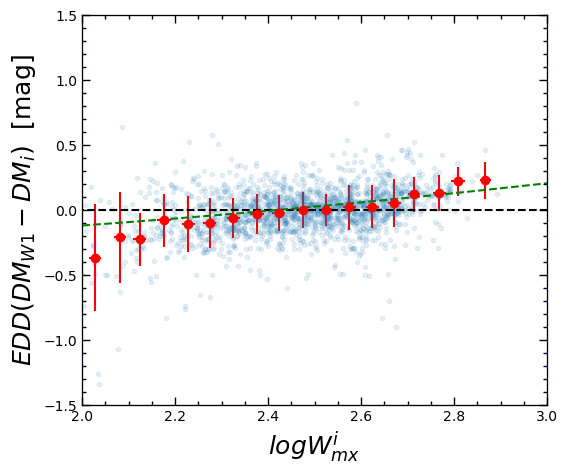

In [38]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']
dDMz = table['P0']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,0.05):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.05:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(2,3)


v = np.linspace(2, 3,20)
c = np.polyfit(X[(X>2.0)&(X<2.9)],Y[(X>2.0)&(X<2.9)], 3, w=1./Ye[(X>2.0)&(X<2.9)])
# ax.plot(v,c[0]*v**3+c[1]*v**2+c[2]*v+c[3], 'r--')

c = np.polyfit(X, Y, 2, w=1./Ye)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'g--')



ax.set_ylim(-1.5,1.5)

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print c
set_axes(ax, fontsize=10)

0.0
0.008498412242361485


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05e0eb2ed0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05e0fa4d90>)

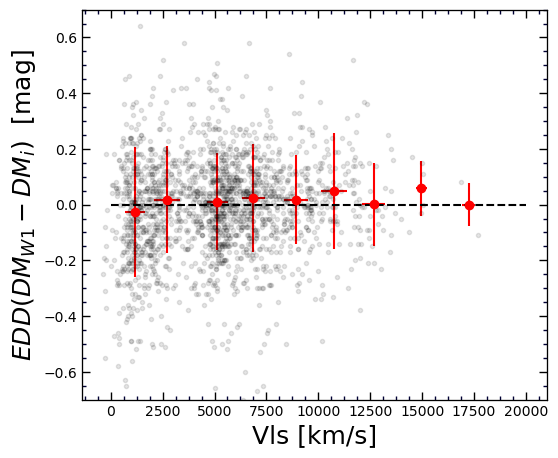

In [39]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vls[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    ype  = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
            ype.append(Ye[ii])
    if len(xp)>0:
        yp = np.asarray(yp)
        ype = np.asarray(ype)
        yy =  np.sum(yp/ype)/np.sum(1./ype) # np.median(yp)  #
        ax.errorbar(np.median(xp), yy, yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


# v = np.linspace(0,20000,2000)
# c = np.polyfit(X,Y, 1)
# ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)

# c = np.polyfit(X,Y, 0, w=1./Ye)
# ax.plot(v, v*0+c[0], '--')


ax.set_xlabel('Vls [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print  np.sum(Y/Ye)/np.sum(1./Ye)

set_axes(ax, fontsize=10)

In [40]:
np.median(Y)

0.0

0.0
[0.00153009 0.00241862 0.02568683]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05e013f5d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05e02062d0>)

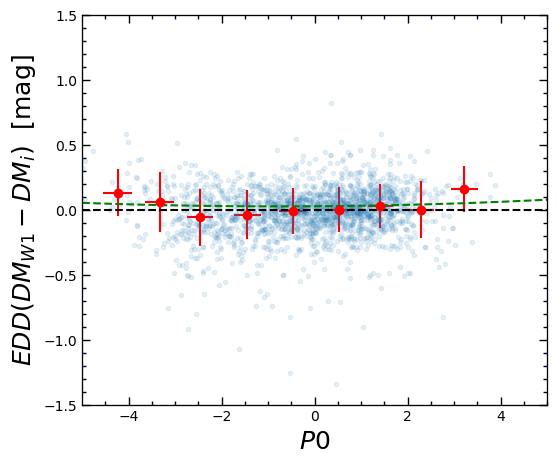

In [41]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']
P0 = table['P0']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = P0[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(-5,5,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([-5,5], [0,0], 'k--')
ax.set_xlim(-5,5)


v = np.linspace(-5,5,20)
c = np.polyfit(X, Y, 2, w=1./Ye)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'g--')



ax.set_ylim(-1.5,1.5)

ax.set_xlabel(r'$P0$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print c
set_axes(ax, fontsize=10)

[ 0.01317409 -0.41393955]
0.0


(-1.5, 1.5)

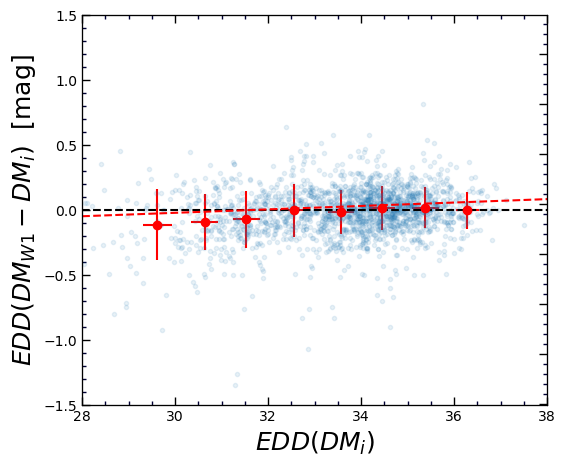

In [42]:
DMr  = table['DMr']
DMz  = table['DMz']
DMi  = table['DMi']

DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = DMi[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(29,37,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(28,38)


v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 1, w=1./Ye)
ax.plot(v,m[0]*v+m[1], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$EDD(DM_{i})$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
set_axes(ax, fontsize=10)
ax.set_ylim(-1.5,1.5)

[ 0.00461035 -0.28557554  4.39531156]
-0.01999999999999602


(-1.5, 1.5)

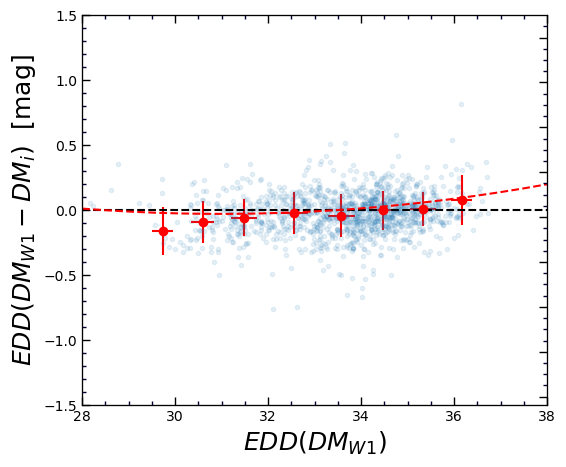

In [43]:
DMr  = table['DMr']
DMz  = table['DMz']
DMi  = table['DMi']

DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0)&(logWimx<2.6) &(logWimx>2.2))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = DM_w1[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(29,37,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(28,38)


v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 2, w=1./Ye)
ax.plot(v,m[0]*v**2+m[1]*v+m[2], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$EDD(DM_{W1})$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
set_axes(ax, fontsize=10)
ax.set_ylim(-1.5,1.5)

[-0.25788488 -0.10047724]
0.0


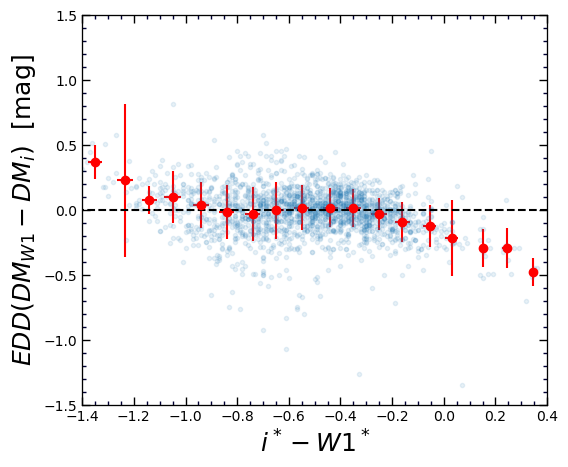

In [71]:
DMr  = table['DMr']
DMz  = table['DMz']
DMi  = table['DMi']

DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0) & (keep==1))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = iii[indx]-w11[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(-1.4,0.4,0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(-1.4,0.4)
ax.set_ylim(-1.5,1.5)

v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 1, w=1./Ye)
ax.plot(v,m[0]*v+m[1], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$i^*-W1^*$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
set_axes(ax, fontsize=10)

ax.plot([-2,2], [0,0], 'k--')

[-0.0096409   0.33106887]
0.0
[-0.0096409   0.33106887]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05c35aa690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05e009aa50>)

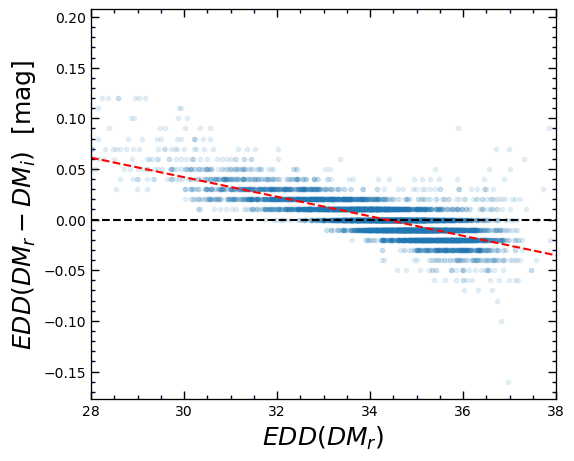

In [45]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = DMr[indx] #
Y = (DMr[indx])-DMi[indx]
Ye = np.sqrt(dDMr**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(28,38)


v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 1, w=1/Ye)
ax.plot(v,m[0]*v+m[1], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$EDD(DM_{r})$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print m
set_axes(ax, fontsize=10)

[-0.00097503  0.03241875]
0.0
[-0.00097503  0.03241875]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05c330b8d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05c3432710>)

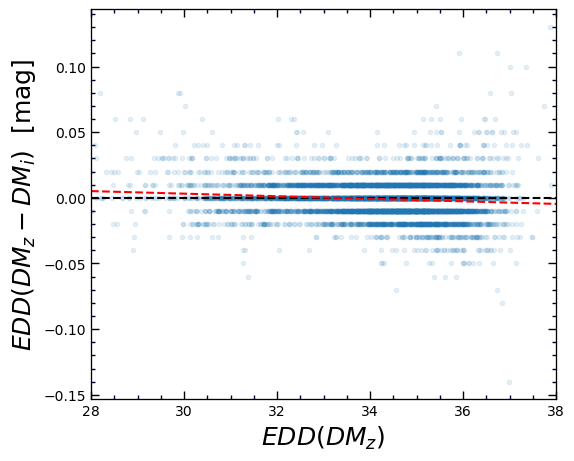

In [46]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = DMz[indx] #
Y = (DMz[indx])-DMi[indx]
Ye = np.sqrt(dDMz**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(28,38)


v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 1, w=1/Ye)
ax.plot(v,m[0]*v+m[1], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$EDD(DM_{z})$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{z}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print m
set_axes(ax, fontsize=10)

[ 0.09775753 -0.49639948  0.62581762]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05c30e24d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05c3281f90>)

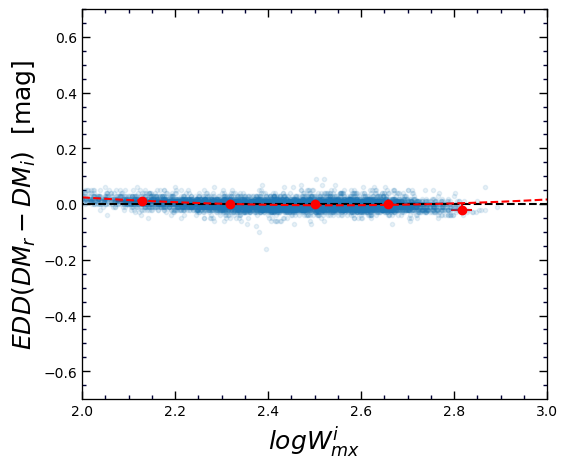

In [47]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #
Y = (DMr[indx])-DMi[indx]
Ye = np.sqrt(dDMr**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(2,3)


v = np.linspace(2, 3,20)
c = np.polyfit(X,Y, 2)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'r--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

[-0.04213345  0.20791112 -0.25377253]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f05c2e5bad0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05c36e6450>)

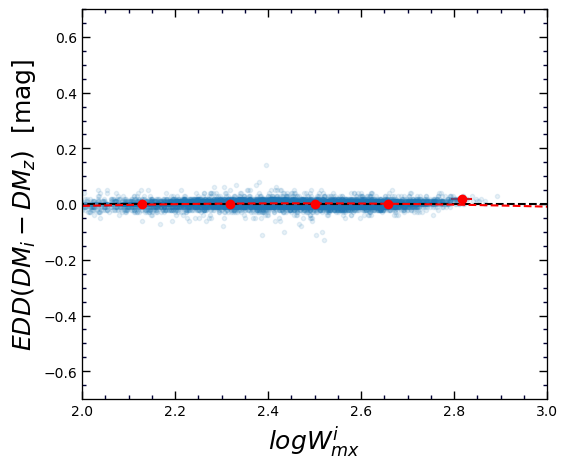

In [48]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #
Y = (DMi[indx])-DMz[indx]
Ye = np.sqrt(dDMi**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(2,3)


v = np.linspace(2, 3,20)
c = np.polyfit(X,Y, 2)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'r--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{i}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)